# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load the data and setup the datasets.
import matplotlib.image as mpimg
import numpy as np
import os
import os.path as path
import pickle

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

# Load pickled data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Setup the "extra test set"
files = list(filter(lambda f: f.endswith(".jpg"),
                    os.listdir("web-traffic-signs-processed")))
X_test_extra = np.empty([len(files), 32, 32, 3], dtype=np.uint8)
for i in range(len(files)):
    image_file = path.join("web-traffic-signs-processed", files[i])
    image = mpimg.imread(image_file)

    X_test_extra[i] = np.array(image)
    
y_test_extra = np.empty([5], dtype=np.int)

y_test_extra[0] = 5
y_test_extra[1] = 9
y_test_extra[2] = 17
y_test_extra[3] = 13
y_test_extra[4] = 12

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Display summary data about the datasets.

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_valid = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# Number of extra test examples.
n_test_extra = len(X_test_extra)

# What's the shape of an traffic sign image?
image_shape = [len(X_train[0][0]), len(X_train[0][1]), len(X_train[0][0][0])]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples = ", n_valid)
print("Number of testing examples =", n_test)
print("Number of extra testing examples =", n_test_extra)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples =  4410
Number of testing examples = 12630
Number of extra testing examples = 5
Image data shape = [32, 32, 3]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

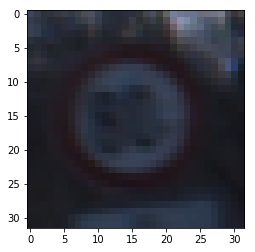

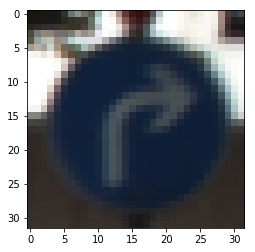

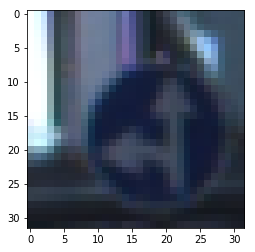

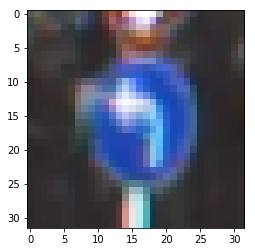

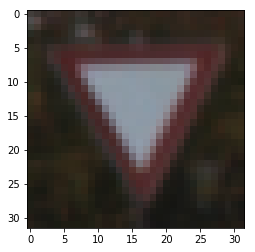

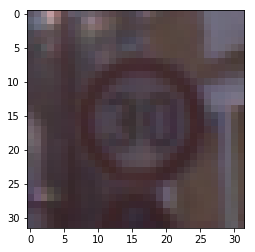

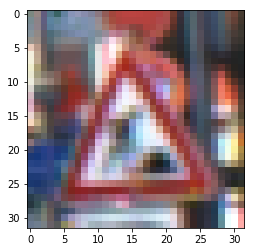

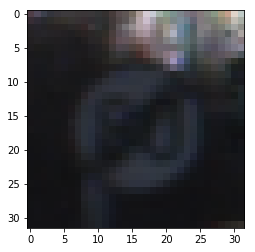

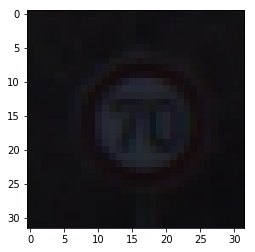

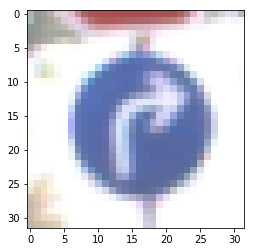

In [3]:
# Visualize the dataset by simply displaying 10 random images from the training dataset.

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

from random import randint

phi = 1.0
theta = 1.0

for i in range(10):
    example = randint(0, n_train - 1)

    plt.figure()
    plt.imshow(X_train[example])
    plt.imsave(path.join("examples", "training_image_{}.jpg".format(i + 1)),
               X_train[example])
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
# Define pre-processing functions
import cv2

def grayscale(img):
    """
    Applies the Grayscale transform
    
    `img` is the image that the transform should be applied to
    """
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


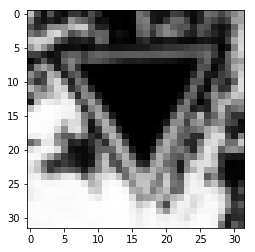

In [5]:
# Generate example grayscale image

grayscale_example = grayscale(
    plt.imread(path.join("examples",
                         "image_before_grayscale.jpg")))

plt.imsave(path.join("examples", "image_after_grayscale.jpg"),
           grayscale_example,
           cmap="Greys")
plt.figure()
plt.imshow(grayscale_example, cmap="Greys")


In [6]:
# Define functions functions for jittering the dataset.
from random import randint, uniform
from scipy.misc import imresize
from scipy.ndimage.interpolation import rotate


def shift(img, x, y):
    """
    Shifts an image in the x direction by x pixels and in the y direction by y
    pixels.
    
    `img` is the image to shift
    `x` is the number of pixels to shift the image in the x direction
    `y` is the number of pixels to shift the image in the y direction
    
    The image is copied and returned and not modified in place.
    """
    non = lambda s: s if s < 0 else None
    mom = lambda s: max(0, s)

    shift_img = np.zeros_like(img, dtype=np.uint8)
    shift_img[mom(y):non(y), mom(x):non(x)] = img[mom(-y):non(-y), mom(-x):non(-x)]
    
    return shift_img


def random_shift(img, x_range=[-2, 2], y_range=[-2, 2]):
    """
    Shifts an image in the x and y by a random number of pixels within the given
    range.
    
    `img` is the image to shift
    `x_range` is the range to choose for the shift in the x direction
    `y_range` is the range to choose for the shift in the y direction
    
    The image is copied and returned and not modified in place.
    """
    return shift(img, randint(x_range[0], x_range[1]), randint(y_range[0], y_range[1]))


def resize(img, scale=0.9):
    """
    Resizes an image according to the given scale.
    
    `img` is the image to resize
    `scale` specifies how much the image should be scaled
    
    A scale <1 will result in the image shrinking while a scale >1 will enlarge the
    image.
    
    The returned image will always have the same shape as original.
    If scale was set such that the image was made smaller, pixels around
    the border are set to 0. If the scale was set such that the image was
    made bigger, parts of the image will be truncated.
    
    The image is copied and returned and not modified in place.
    """
    resized = imresize(img, scale)
    
    x_pad = max(0, img.shape[0] - resized.shape[0])
    y_pad = max(0, img.shape[1] - resized.shape[1])
    
    if x_pad > 0 or y_pad > 0:
        left_pad = int(x_pad / 2 if x_pad % 2 == 0 else (x_pad / 2) + 1)
        right_pad = int(x_pad / 2)
        
        top_pad = int(y_pad / 2 if y_pad % 2 == 0 else (y_pad / 2) + 1)
        bottom_pad = int(y_pad / 2)
    
        resized = np.pad(resized,
                         ((left_pad, right_pad),
                          (top_pad, bottom_pad),
                          (0, 0)),
                         "constant")
        
    x_trim = max(0, resized.shape[0] - img.shape[0])
    y_trim = max(0, resized.shape[1] - img.shape[1])
    
    if x_trim > 0 or y_trim > 0:
        left_trim = int(x_trim / 2 if x_trim % 2 == 0 else (x_trim / 2) + 1)
        right_trim = int(x_trim / 2)
        
        top_trim = int(y_trim / 2 if y_trim % 2 == 0 else (y_trim / 2) + 1)
        bottom_trim = int(y_trim / 2)
        resized = resized[left_trim:(resized.shape[0]-right_trim),
                          top_trim:(resized.shape[1]-bottom_trim), :]
    
    return resized


def random_resize(img, scale_range=[0.9, 1.1]):
    """
    Randomly resize the image within the given range inclusive.
    
    `img` is the image to be randomly resized
    `scale_range` specifies the range to stay within for scaling the image
    
    The image is copied and returned and not modified in place.
    """
    return resize(img, uniform(scale_range[0], scale_range[1]))


def random_rotate(img, angle_range=[-15.0, 15.0]):
    """
    Randomly rotate the image within the given range of degrees.
    
    `img` is the image to randomly rotate
    `angle_range` specifies the minimum and maximum number of degrees
    
    The image is copied and returned and not modified in place.
    """
    return rotate(img, uniform(angle_range[0], angle_range[1]), reshape=False)


def jitter(X_train, y_train, jitter_funcs):
    """
    Returns a new training set that has been jittered according to the list of
    jitter functions.
    
    `X_train` is the set of examples
    `y_train` are the labels for the examples
    `jitter_funcs` is a list of jitter functions to apply

    A new example will be generated for each combination of original example and
    jitter function, e.g. if there are 10 training examples and 3 jitter
    functions then there will be 40 examples in the returned training set since
    the original examples are also returned.
    """
    all_X_train_jittered = [X_train]
    all_y_train_jittered = [y_train]
    
    for j in range(len(jitter_funcs)):
        X_train_jittered = np.empty_like(X_train)
        y_train_jittered = np.empty_like(y_train)
        
        all_X_train_jittered.append(X_train_jittered)
        all_y_train_jittered.append(y_train_jittered)

    for i in range(len(X_train)):
        for j in range(len(jitter_funcs)):
            all_X_train_jittered[j + 1][i] = jitter_funcs[j](X_train[i])
            all_y_train_jittered[j + 1][i] = y_train[i]
        
    return np.concatenate(all_X_train_jittered), \
        np.concatenate(all_y_train_jittered)


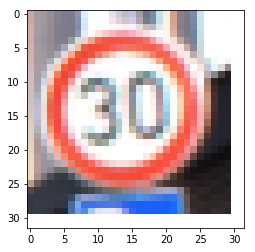

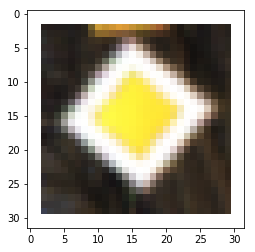

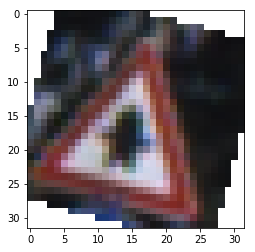

In [7]:
# Generate example images resulting from each of the jitter functions above.

shift_example = shift(
    plt.imread(path.join("examples", "image_before_random_shift.jpg")), -2, -2)
plt.imsave(path.join("examples", "image_after_random_shift.jpg"),
           shift_example)
plt.figure()
plt.imshow(shift_example)

resize_example = resize(
    plt.imread(path.join("examples", "image_before_random_resize.jpg")), 0.9)
plt.imsave(path.join("examples", "image_after_random_resize.jpg"),
           resize_example)
plt.figure()
plt.imshow(resize_example)

rotate_example = rotate(
    plt.imread(path.join("examples", "image_before_random_rotate.jpg")),
    -15.0,
    reshape=False)
plt.imsave(path.join("examples", "image_after_random_rotate.jpg"),
           rotate_example)
plt.figure()
plt.imshow(rotate_example)


In [8]:
# Preprocess the data for training.
from sklearn.utils import shuffle


X_train, y_train = jitter(X_train, y_train,
                          [random_shift, random_resize, random_rotate])
    
X_train = [np.reshape(grayscale(x), [32, 32, 1]) for x in X_train]
X_valid = [np.reshape(grayscale(x), [32, 32, 1]) for x in X_valid]

X_train, y_train = shuffle(X_train, y_train)


### Model Architecture

In [9]:
# Define the neural network architecture.
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def conv2d(input, input_depth, filter_size, stride_size, output_depth, mu=0.0,
           sigma=0.1):
    """
    Performs a 2-dimensional convolution on some input.
    
    `input_depth` specifies the depth of the input
    `filter_size` specifies the width and height of the filter
    `stride_size` specifies the stride width and height
    `output_depth` specifies the output depth
    `mu` specifies the mean of the normal distribution from which to draw
    initial weights
    `sigma` specifies the std deviation of the normal distribution from which
    to draw initial weights

    Weights for the filters will be initialized by drawing values randomly
    from a truncated normal distribution. A truncated normal distribution is
    one where values more than 2 std deviations from the mean are repicked.
    Biases will be set to zero.
    VALID padding is always used for the filters.
    """
    F_W = tf.Variable(tf.truncated_normal([filter_size, filter_size, input_depth, output_depth],
                                          mean=mu, stddev=sigma))
    F_b = tf.Variable(tf.zeros([output_depth]))
    strides = [1, stride_size, stride_size, 1]
    # Always use valid padding
    padding = 'VALID'
    # https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#conv2d
    # `tf.nn.conv2d` does not include the bias computation so we have to add it ourselves after.
    return tf.nn.conv2d(input, F_W, strides, padding) + F_b


def fullconnect(input, input_size, output_size, mu=0.0, sigma=0.1):
    """
    Creates a fully connected layer having the given input size and the given
    output size.
    
    `input` is the input layer
    `input_size` specifies the size of the input layer
    `output_size` specifies the size of the output layer
    `mu` specifies the mean of the normal distribution from which to draw
    initial weights
    `sigma` specifies the std deviation of the normal distribution from which
    to draw initial weights
    
    Weights for the filters will be initialized by drawing values randomly from
    a truncated normal distribution. A truncated normal distribution is one where
    values more than 2 std deviations from the mean are repicked.
    Biases will be set to zero.
    """
    weights = tf.Variable(tf.truncated_normal([input_size, output_size],
                                              mean=mu, stddev=sigma))
    biases = tf.Variable(tf.zeros([output_size]))
    return tf.add(tf.matmul(input, weights), biases)


def maxpool(input, kernel_size, stride_size):
    """
    Applies the max pool function using the given kernel size and stride size.
    
    `input` is the input layer for the maxpool operation
    `kernel_size` specifies the size of the kernel to use for the maxpool
    operation
    `stride_size` specifies the stride to use when applying the maxpool
    operation
    """
    return tf.nn.max_pool(input,
                          ksize=[1, kernel_size, kernel_size, 1],
                          strides=[1, stride_size, stride_size, 1],
                          padding='VALID')


def meanpool(input, kernel_size, stride_size):
    """
    Applies the mean pool function using the given kernel size and stride size.
    
    `input` is the input layer for the maxpool operation
    `kernel_size` specifies the size of the kernel to use for the maxpool
    operation
    `stride_size` specifies the stride to use when applying the maxpool
    operation
    """
    return tf.nn.avg_pool(input,
                      ksize=[1, kernel_size, kernel_size, 1],
                      strides=[1, stride_size, stride_size, 1],
                      padding='VALID')


def LeNet(x, n_classes, activation=tf.nn.relu, pool=maxpool):
    """
    Creates a neural network that uses the LeNet architecture.
    
    `x` is the input to the network
    `n_classes` are the number of classes that the network is being used to 
    classify
    `activation` specifies the activation function to use
    `pool` specifies the pooling operation to use
    
    Note that the input to the network, x, must be 32x32x1.
    """
    #
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # No padding since we are using valid padding.
    #
    out = conv2d(x, 1, 5, 1, 6)
    out = activation(out)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    out = pool(out, 2, 2)

    #
    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    #
    out = conv2d(out, 6, 5, 1, 16)
    out = activation(out)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    out = pool(out, 2, 2)
    # Flatten. Input = 5x5x16. Output = 400.
    out = tf.reshape(out, [-1, 400])
    
    #
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    #
    out = fullconnect(out, 400, 120)
    out = activation(out)
    
    #
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    #
    out = fullconnect(out, 120, 84)
    out = activation(out)

    #
    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    #
    out = fullconnect(out, 84, n_classes)
    
    return out


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
# Define hyperparameters

learning_rate = 0.001
epochs = 20
batch_size = 256


In [11]:
# Define evaluation function

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x, n_classes, activation=tf.nn.softsign)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    """
    Calculates the accuracy of the model on the given dataset.
    
    `X_data` are the examples
    `y_data` are the labels for each of the examples
    
    This function must be called inside a tensorflow session. The evaulation is
    done using the current model.
    """
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], \
                            y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation,
                            feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [12]:
# Train model.

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.882

EPOCH 2 ...
Validation Accuracy = 0.920

EPOCH 3 ...
Validation Accuracy = 0.934

EPOCH 4 ...
Validation Accuracy = 0.938

EPOCH 5 ...
Validation Accuracy = 0.938

EPOCH 6 ...
Validation Accuracy = 0.939

EPOCH 7 ...
Validation Accuracy = 0.945

EPOCH 8 ...
Validation Accuracy = 0.942

EPOCH 9 ...
Validation Accuracy = 0.941

EPOCH 10 ...
Validation Accuracy = 0.940

EPOCH 11 ...
Validation Accuracy = 0.941

EPOCH 12 ...
Validation Accuracy = 0.948

EPOCH 13 ...
Validation Accuracy = 0.944

EPOCH 14 ...
Validation Accuracy = 0.940

EPOCH 15 ...
Validation Accuracy = 0.953

EPOCH 16 ...
Validation Accuracy = 0.949

EPOCH 17 ...
Validation Accuracy = 0.946

EPOCH 18 ...
Validation Accuracy = 0.950

EPOCH 19 ...
Validation Accuracy = 0.945

EPOCH 20 ...
Validation Accuracy = 0.954

Model saved


In [13]:
# Pre-process test set first by converting to grayscale.

X_test = [np.reshape(grayscale(x), [32, 32, 1]) for x in X_test]

In [14]:
# Calculate accuracy on the test set.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Test Accuracy = 0.942


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

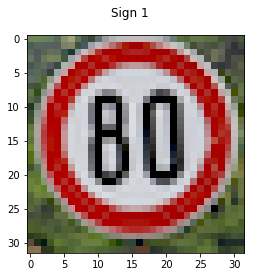

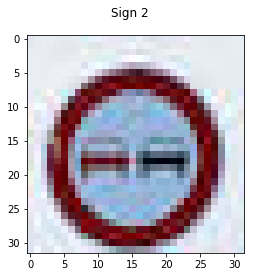

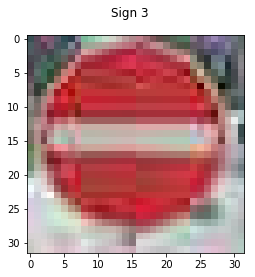

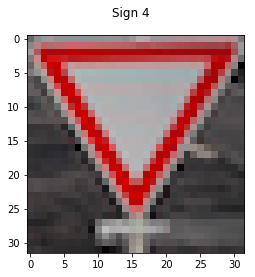

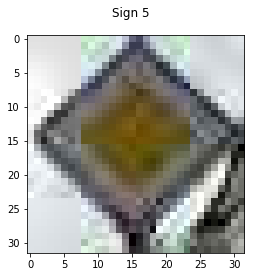

In [15]:
# Display images in the extra test set.

for i in range(len(X_test_extra)):        
    plt.figure().suptitle("Sign {}".format(i + 1))
    plt.imshow(X_test_extra[i])


### Predict the Sign Type for Each Image

In [16]:
# Pre-process extra test set by converting to grayscale.

X_test_extra = [np.reshape(grayscale(x), [32, 32, 1]) for x in X_test_extra]


In [17]:
# Load sign to text classifications from csv file.
import csv

signs = []
with open('signnames.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        signs.append(row)


In [26]:
# Run the predictions on the pre-processed images in the extra test set.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    softmax = tf.nn.softmax(logits)
    classifications = sess.run(softmax, feed_dict={x: X_test_extra})
    
    for i in range(len(classifications)):
        values, indices = tf.nn.top_k(classifications[i])
        print("Sign", i + 1, "is", signs[indices[0].eval()]["SignName"])


Sign 1 is Keep left
Sign 2 is No passing
Sign 3 is No entry
Sign 4 is Yield
Sign 5 is Priority road


### Analyze Performance

In [27]:
# Calculate the accuracy for extra test set images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_extra, y_test_extra)
    print("Extra Test Accuracy = {:.3f}".format(test_accuracy))


Extra Test Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [37]:
# Print out top 5 softmax probabilities

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    for i in range(len(classifications)):
        values, indices = tf.nn.top_k(classifications[i], k = 5)
        probabilities = values.eval()
        indices = indices.eval()
        
        print("## Top 5 softmax probabilities for sign", i + 1, "##")
        for i in range(len(probabilities)):
            print("Probability", probabilities[i], "Prediction", signs[indices[i]]["SignName"])
        print()

## Top 5 softmax probabilities for sign 1 ##
Probability 0.426929 Prediction Keep left
Probability 0.277613 Prediction Speed limit (30km/h)
Probability 0.141507 Prediction Speed limit (50km/h)
Probability 0.0580122 Prediction Roundabout mandatory
Probability 0.0360092 Prediction Children crossing

## Top 5 softmax probabilities for sign 2 ##
Probability 0.999585 Prediction No passing
Probability 0.000368811 Prediction Priority road
Probability 2.25628e-05 Prediction Ahead only
Probability 1.01326e-05 Prediction Vehicles over 3.5 metric tons prohibited
Probability 3.66784e-06 Prediction End of no passing

## Top 5 softmax probabilities for sign 3 ##
Probability 0.999121 Prediction No entry
Probability 0.000372152 Prediction No passing
Probability 0.000263223 Prediction Stop
Probability 0.000205887 Prediction Turn left ahead
Probability 1.853e-05 Prediction Turn right ahead

## Top 5 softmax probabilities for sign 4 ##
Probability 0.982527 Prediction Yield
Probability 0.010628 Prediction

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 